<AxesSubplot:xlabel='Week'>

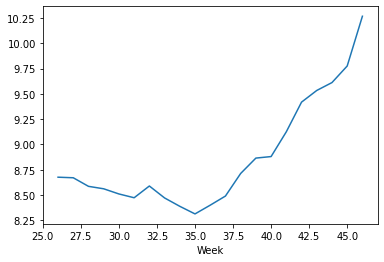

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://finance.yahoo.com/quote/TRY%3DX/history?p=TRY%3DX"

headers = {"User-Agent": "Mozilla/5.0"}
source = requests.get(url, headers=headers).text
soup = BeautifulSoup(source)

table = soup.table
table_rows = table.find_all('tr')
table_ls = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    table_ls.append(row)

df = pd.DataFrame(table_ls)

new_cols = ['Date', 'Open', 'High', 'Low', 'Close', "Adj.Close", "Volume"]

new_names_map = {df.columns[i]: new_cols[i] for i in range(len(new_cols))}
df.rename(new_names_map, axis=1, inplace=True)

# df[df['Contract_Name'].str.strip().astype(bool)]

df.dropna(axis=0, inplace=True)

df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y') # format=YYYY-MM-DD


df = df.set_index(df["Date"].values)
df = df.replace(",", "", regex=True)


# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week

df[['Open', 'High', 'Low', 'Close', "Adj.Close"]] = df[['Open', 'High', 'Low', 'Close', "Adj.Close"]].apply(
    pd.to_numeric)

mean_weekly = df.groupby("Week").mean()

df_ts = pd.Series(mean_weekly.Open)
df_ts.plot()

<AxesSubplot:>

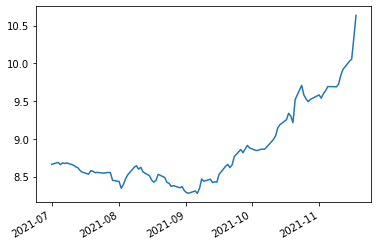

In [2]:
df_ts = pd.Series(df.Open)
df_ts.plot()

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj.Close,Volume,Year,Month,Week
2021-11-18,2021-11-18,10.6375,11.2850,10.4150,11.0650,11.0650,-,2021,11,46
2021-11-17,2021-11-17,10.3421,10.6759,10.3347,10.3422,10.3422,-,2021,11,46
2021-11-16,2021-11-16,10.0572,10.3721,10.0547,10.0575,10.0575,-,2021,11,46
2021-11-15,2021-11-15,10.0302,10.0714,9.9491,10.0296,10.0296,-,2021,11,46
2021-11-12,2021-11-12,9.9213,9.9898,9.8735,9.9209,9.9209,-,2021,11,45
